## Deep Dreaming with Inception Model

#### Import necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from libs import gif, nb_utils
import IPython.display as ipyd
%matplotlib inline

c:\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from libs import inception
net = inception.get_inception_model()

#### Graph of Inception model

In [3]:
nb_utils.show_graph(net['graph_def'])

In [4]:
tf.import_graph_def(net['graph_def'], name='inception')

In [5]:
from skimage.data import coffee

In [6]:
def normalize(img, s=0.1):
    '''Normalize the image range for visualization'''
    z = img / np.std(img)
    return np.uint8(np.clip(
        (z - z.mean()) / max(z.std(), 1e-4) * s + 0.5,
        0, 1) * 255)

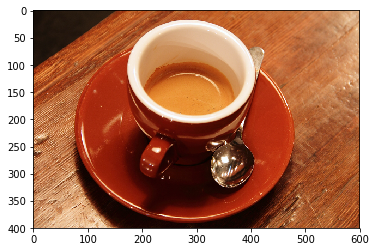

In [7]:
cf = coffee()
plt.imshow(cf)

In [8]:
# Resize image
img = inception.preprocess(cf)
print(img.shape)

(299, 299, 3)


c:\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [9]:
img_4d = img[np.newaxis]
print(img_4d.shape)

(1, 299, 299, 3)


In [10]:
# Rescaling image
img_4d = img_4d / np.mean(img_4d)

#### All the operations of Inception Model

In [11]:
g = tf.get_default_graph()

In [12]:
all_operations = [ops.name for ops in g.get_operations()] 
print(all_operations)

['inception/input', 'inception/conv2d0_w', 'inception/conv2d0_b', 'inception/conv2d1_w', 'inception/conv2d1_b', 'inception/conv2d2_w', 'inception/conv2d2_b', 'inception/mixed3a_1x1_w', 'inception/mixed3a_1x1_b', 'inception/mixed3a_3x3_bottleneck_w', 'inception/mixed3a_3x3_bottleneck_b', 'inception/mixed3a_3x3_w', 'inception/mixed3a_3x3_b', 'inception/mixed3a_5x5_bottleneck_w', 'inception/mixed3a_5x5_bottleneck_b', 'inception/mixed3a_5x5_w', 'inception/mixed3a_5x5_b', 'inception/mixed3a_pool_reduce_w', 'inception/mixed3a_pool_reduce_b', 'inception/mixed3b_1x1_w', 'inception/mixed3b_1x1_b', 'inception/mixed3b_3x3_bottleneck_w', 'inception/mixed3b_3x3_bottleneck_b', 'inception/mixed3b_3x3_w', 'inception/mixed3b_3x3_b', 'inception/mixed3b_5x5_bottleneck_w', 'inception/mixed3b_5x5_bottleneck_b', 'inception/mixed3b_5x5_w', 'inception/mixed3b_5x5_b', 'inception/mixed3b_pool_reduce_w', 'inception/mixed3b_pool_reduce_b', 'inception/mixed4a_1x1_w', 'inception/mixed4a_1x1_b', 'inception/mixed4a_3

In [13]:
x = g.get_tensor_by_name('inception/input:0')
layer = g.get_tensor_by_name('inception/maxpool0:0')

In [14]:
#find the gradient of mean of this layer's activation
gradient = tf.gradients(tf.reduce_mean(layer), x)
img_copy = img_4d.copy()
n_iterations = 50
step = 1
gif_step = 5
imgs= []

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 

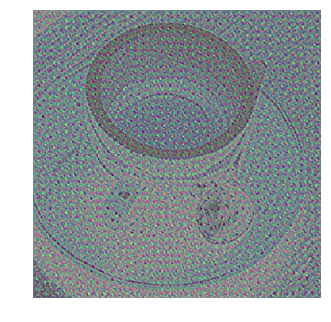

In [15]:
sess= tf.InteractiveSession()
for itr in range(n_iterations):
    print(itr, end=', ')
    #calculate the gradient of the layer we chose with respect to the input image.
    this_res = sess.run(gradient[0], feed_dict={x: img_copy})[0]
    #normalize image
    this_res =  this_res/ (np.max(np.abs(this_res)) + 1e-8)
    #add it back to the input image
    img_copy = img_copy + this_res * step
    
    if itr % gif_step == 0:
        imgs.append(normalize(img_copy[0]))
        
gif.build_gif(imgs, saveto='1-simple-mean_layer.gif')

In [16]:
ipyd.Image(url='1-simple-mean_layer.gif', height=250, width=300)

In [17]:
# maximal neuron in the layer
max_neuron = tf.reduce_max(layer, len(layer.get_shape())-1)
gardient = tf.gradients(tf.reduce_mean(max_neuron), x)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 

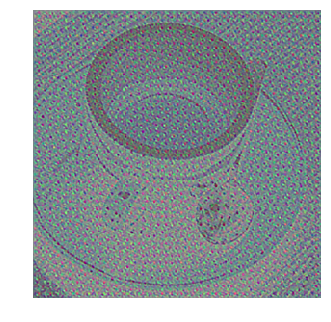

In [18]:
img_copy = img_4d.copy()
imgs= []
for itr in range(n_iterations):
    print(itr, end=', ')
    #calculate the gradient of the layer we chose with respect to the input image.
    this_res = sess.run(gradient[0], feed_dict={x: img_copy})[0]
    #normalize image
    this_res =  this_res/ (np.max(np.abs(this_res)) + 1e-8)
    #add it back to the input image
    img_copy = img_copy + this_res * step
    
    if itr % gif_step == 0:
        imgs.append(normalize(img_copy[0]))
        
gif.build_gif(imgs, saveto='1-simple-max_neuron.gif')

In [19]:
ipyd.Image(url='1-simple-max_neuron.gif', height=250, width=300)

In [20]:
features = [operation for operation in all_operations if 'maxpool' in operation.split('/')[-1]]
print(features)

['inception/maxpool0', 'inception/maxpool1', 'inception/maxpool4', 'inception/maxpool10']


0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 

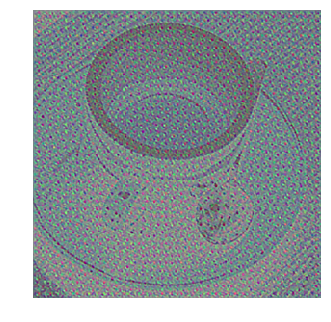

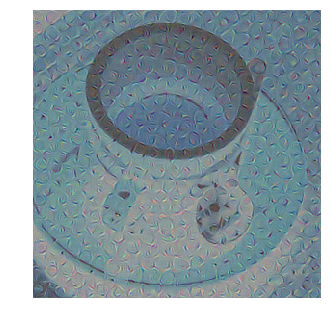

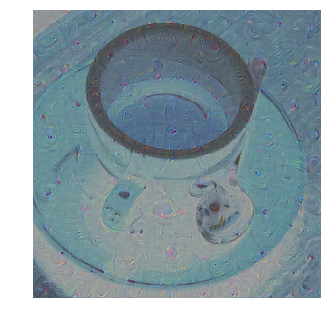

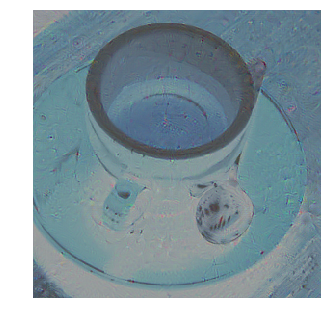

In [21]:
# for each max pooling feature
for feature_i in features:
    layer = g.get_tensor_by_name(feature_i + ':0')
    gradient = tf.gradients(tf.reduce_mean(layer), x)
    img_copy = img_4d.copy()
    imgs = []
    for it_i in range(n_iterations):
        print(it_i, end=', ')
        this_res = sess.run(gradient[0], feed_dict={x: img_copy})[0]
        this_res /= (np.max(np.abs(this_res)) + 1e-8)
        img_copy += this_res * step
        if it_i % gif_step == 0:
            imgs.append(normalize(img_copy[0]))
    gif.build_gif(
        imgs, saveto='1-simplest/1-simplest-' + feature_i.split('/')[-1] + '.gif')

When we look at the outputs of these, we should see the representations in corresponding layers being amplified on the original input image. As we get to later layers, it really starts to appear to hallucinate, and the patterns start to get more complex. That's not all though. The patterns also seem to grow larger. What that means is that at later layers, the representations span a larger part of the image. In neuroscience, we might say that this has a larger receptive field, since it is receptive to the content in a wider visual field.

In [22]:
#feed in noise instead of an image:
img_noise = inception.preprocess(
    (np.random.randint(100, 150, size=(299, 299, 3), dtype=np.uint8)))[np.newaxis]
print(img_noise.min(), img_noise.max())

-17.0 32.0


c:\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 

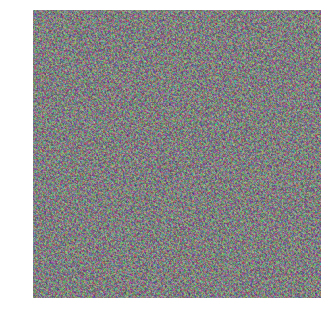

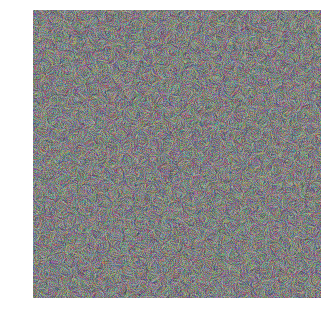

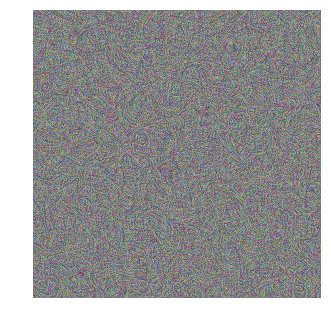

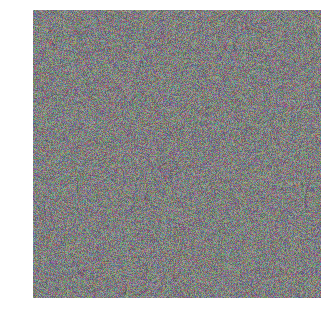

In [23]:
for feature_i in features:
    layer = g.get_tensor_by_name(feature_i + ':0')
    gradient = tf.gradients(tf.reduce_mean(layer), x)
    img_copy = img_noise.copy()
    imgs = []
    for it_i in range(n_iterations):
        print(it_i, end=', ')
        this_res = sess.run(gradient[0], feed_dict={x: img_copy})[0]
        this_res /= (np.max(np.abs(this_res)) + 1e-8)
        img_copy += this_res * step
        if it_i % gif_step == 0:
            imgs.append(normalize(img_copy[0]))
    gif.build_gif(
        imgs, saveto='1-simplest-noise/1-simplest-noise-' + feature_i.split('/')[-1] + '.gif')

#### Activating a particular neuron

In [24]:
layer = g.get_tensor_by_name('inception/mixed5b_pool_reduce_pre_relu:0')
# find shape
layer_shape = tf.shape(layer).eval(feed_dict={x:img_4d})
print('layer shape: ',layer_shape)
# calulate no. of output channels
n_els = layer_shape[-1]
print('no of out. channels: ',n_els)

layer shape:  [  1  10  10 128]
no of out. channels:  128


In [25]:
# select a random output channel
neuron_i = np.random.randint(n_els)
# activation layer with all 0's 
layer_vec = np.zeros(layer_shape)
# setting 1 for a random neuron
layer_vec[..., neuron_i] = 1
neuron = tf.reduce_max(layer, len(layer.get_shape())-1)
gradient = tf.gradients(tf.reduce_mean(neuron),x)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 

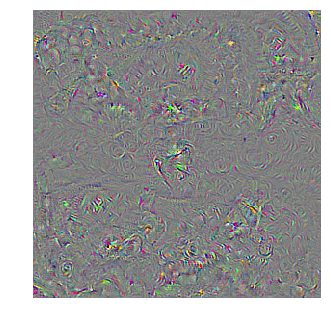

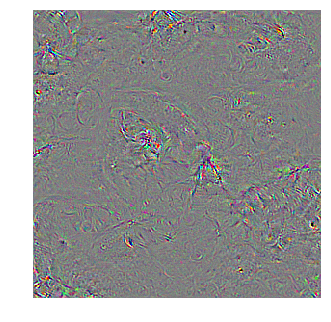

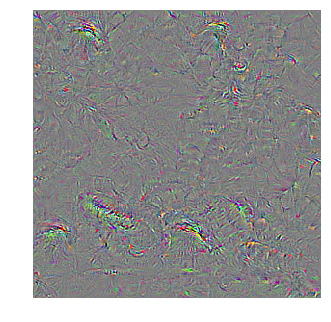

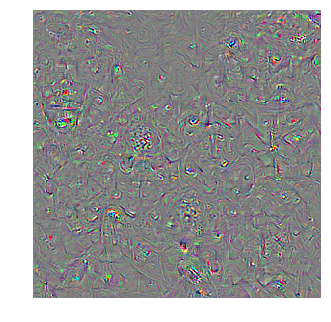

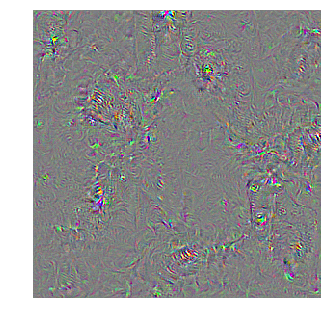

In [26]:
n_iterations = 30
for i in range(5):
    neuron_i = np.random.randint(n_els)
    layer_vec = np.zeros(layer_shape)
    layer_vec[..., neuron_i] = 1
    img_copy = img_noise.copy() / 255.0
    imgs = []
    for it_i in range(n_iterations):
        print(it_i, end=', ')
        this_res = sess.run(gradient[0], feed_dict={
            x: img_copy,
            layer: layer_vec})[0]
        this_res /= (np.max(np.abs(this_res)) + 1e-8)
        img_copy += this_res * step
        if it_i % gif_step == 0:
            imgs.append(normalize(img_copy[0]))
    gif.build_gif(imgs, saveto='2-objective/2-objective-' + str(neuron_i) + '.gif')

In [27]:
#img_copy = img_4d.copy()

In [28]:
neuron_i = 962
print(net['labels'][neuron_i])

(962, 'school bus')


In [29]:
layer = g.get_tensor_by_name(all_operations[-1] + ':0')

gradient = tf.gradients(tf.reduce_max(layer), x)
layer_shape = tf.shape(layer).eval(feed_dict={x: img_noise})
layer_vec = np.zeros(layer_shape)
layer_vec[..., neuron_i] = 1

0, 

c:\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 

c:\python36\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
c:\python36\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
c:\python36\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
c:\python36\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less
c:\python36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


11, 12, 

c:\python36\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
c:\python36\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 23

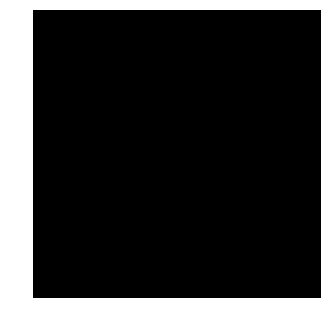

In [30]:
from scipy.ndimage.filters import gaussian_filter
from skimage.transform import resize
sigma = 1.0
blur_step = 5
crop = 1
pth = 5
decay = 0.95
n_iterations = 1000
img_copy = img_noise.copy()
imgs = []
n_img, height, width, ch = img_copy.shape
for it_i in range(n_iterations):
    print(it_i, end=', ')
    this_res /= sess.run(gradient[0], feed_dict={x:img_copy, layer: layer_vec})[0]
    this_res /= (np.max(np.abs(this_res)) + 1e-8)
    img_copy += this_res * step
    img_copy *= decay
    
    
    if it_i % blur_step == 0:
        for ch_i in range(3):
            img_copy[..., ch_i] = gaussian_filter(img_copy[...,ch_i], sigma)
    #print(abs(img_copy))
    mask = (abs(img_copy) < np.percentile(abs(img_copy), pth))
    
    
    img_copy = img_copy - img_copy * mask

    # Crop a 1 pixel border from height and width
    img_copy = img_copy[:, crop:-crop, crop:-crop, :]
    img_copy = resize(img_copy[0], (height, width), order=3, clip=False, preserve_range=True
                 )[np.newaxis].astype(np.float32)

    if it_i % gif_step == 0:
        imgs.append(normalize(img_copy[0]))

gif.build_gif(imgs, saveto='6-fractal/6-fractal.gif')

In [31]:
ipyd.Image(url='6-fractal/6-fractal.gif', height=300, width=300)